## 1. Comparison DEU estimation VS oficial recovered data

In [1]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
import pandas as pd
import numpy as np
from IPython import display
import datetime as dt

In [2]:
# Loading oficial infected data
df_inf_of = pd.read_csv('Confirmed_DEU_OF.csv')
df_inf_of

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,DEU,Europe,Germany,2020-01-28,4,3,0.571429,4,4,4,0.714286
1,DEU,Europe,Germany,2020-01-29,4,0,0.571429,4,4,4,1.285714
2,DEU,Europe,Germany,2020-01-30,4,0,0.571429,4,4,4,1.857143
3,DEU,Europe,Germany,2020-01-31,5,1,0.714286,5,5,5,2.571429
4,DEU,Europe,Germany,2020-02-01,8,3,1.142857,8,8,8,3.714286
...,...,...,...,...,...,...,...,...,...,...,...
550,DEU,Europe,Germany,2021-07-31,3776724,1806,2122.142857,3776724,3684938,31788,28392.714286
551,DEU,Europe,Germany,2021-08-01,3778277,1553,2179.857143,3778277,3686491,31771,29089.857143
552,DEU,Europe,Germany,2021-08-02,3779797,1520,2193.714286,3779797,3687992,33042,29958.000000
553,DEU,Europe,Germany,2021-08-03,3782344,2547,2263.285714,3782344,3690514,32364,30633.428571


In [3]:
# Obtaining dates and confirmed acumulated smooth data
dates_deu_of = df_inf_of['Date'].values
inf_deu_of = df_inf_of['Accumulated Alive Confirmed Smooth in 14 days'].values

len(dates_deu_of), len(inf_deu_of), dates_deu_of[0:5], inf_deu_of[0:5]

(555,
 555,
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object),
 array([0.71428571, 1.28571429, 1.85714286, 2.57142857, 3.71428571]))

In [4]:
# Loading oficial recovered data
df_rec_of = pd.read_csv('Recovered_DEU_OF.csv')
df_rec_of

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,DEU,Europe,Germany,2020-01-28,0,0.000000e+00
1,DEU,Europe,Germany,2020-01-29,0,0.000000e+00
2,DEU,Europe,Germany,2020-01-30,0,0.000000e+00
3,DEU,Europe,Germany,2020-01-31,0,0.000000e+00
4,DEU,Europe,Germany,2020-02-01,0,0.000000e+00
...,...,...,...,...,...,...
550,DEU,Europe,Germany,2021-07-31,3653150,3.649554e+06
551,DEU,Europe,Germany,2021-08-01,3654720,3.651006e+06
552,DEU,Europe,Germany,2021-08-02,3654950,3.652303e+06
553,DEU,Europe,Germany,2021-08-03,3658150,3.653861e+06


In [5]:
# Obtaining recovered smooth data
rec_deu_of = df_rec_of['Total Recovered Smooth (7 days)'].values

len(rec_deu_of), rec_deu_of[0:5]

(555, array([0., 0., 0., 0., 0.]))

In [6]:
# Loading estimated infected data
df_inf_est = pd.read_csv('Confirmed_DEU_EST.csv')
df_inf_est

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,DEU,Europe,Germany,2020-01-28,4,3,0.571429,4,4,4,7.142857e-01
1,DEU,Europe,Germany,2020-01-29,4,0,0.571429,4,4,4,1.285714e+00
2,DEU,Europe,Germany,2020-01-30,4,0,0.571429,4,4,4,1.857143e+00
3,DEU,Europe,Germany,2020-01-31,5,1,0.714286,5,5,5,2.571429e+00
4,DEU,Europe,Germany,2020-02-01,8,3,1.142857,8,8,8,3.714286e+00
...,...,...,...,...,...,...,...,...,...,...,...
782,DEU,Europe,Germany,2022-03-20,18809998,92316,219755.714286,18811093,18684040,2909618,2.802255e+06
783,DEU,Europe,Germany,2022-03-21,18810035,37,191338.857143,18811130,18684077,2742532,2.829030e+06
784,DEU,Europe,Germany,2022-03-22,19058757,248722,189401.571429,19059852,18932518,2730225,2.825476e+06
785,DEU,Europe,Germany,2022-03-23,19217142,158385,169896.000000,19218237,19090793,2625974,2.793418e+06


In [7]:
# Obtaining dates and confirmed acumulated smooth data
dates_deu_est = df_inf_est['Date'].values
inf_deu_est = df_inf_est['Accumulated Alive Confirmed Smooth in 14 days'].values

len(dates_deu_est), len(inf_deu_est), dates_deu_est[0:5], inf_deu_est[0:5]

(787,
 787,
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object),
 array([0.71428571, 1.28571429, 1.85714286, 2.57142857, 3.71428571]))

In [8]:
# Loading estimated recovered data
df_rec_est = pd.read_csv('Recovered_DEU_EST.csv')
df_rec_est

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,DEU,Europe,Germany,2020-01-28,0,0.000000e+00
1,DEU,Europe,Germany,2020-01-29,0,0.000000e+00
2,DEU,Europe,Germany,2020-01-30,0,0.000000e+00
3,DEU,Europe,Germany,2020-01-31,0,0.000000e+00
4,DEU,Europe,Germany,2020-02-01,0,0.000000e+00
...,...,...,...,...,...,...
782,DEU,Europe,Germany,2022-03-20,15774422,1.531086e+07
783,DEU,Europe,Germany,2022-03-21,15941545,1.547528e+07
784,DEU,Europe,Germany,2022-03-22,16202293,1.566808e+07
785,DEU,Europe,Germany,2022-03-23,16464819,1.586991e+07


In [9]:
# Obtaining recovered smooth data
rec_deu_est = df_rec_est['Total Recovered Smooth (7 days)'].values

len(rec_deu_est), rec_deu_est[0:5]

(787, array([0., 0., 0., 0., 0.]))

In [10]:
# Adjustment of the data so that all arrays are the same length
dates_deu_est = dates_deu_est[0:len(dates_deu_of)]
inf_deu_est = inf_deu_est[0:len(dates_deu_of)]
rec_deu_est = rec_deu_est[0:len(dates_deu_of)]

len(dates_deu_of), len(dates_deu_est), len(inf_deu_of), len(inf_deu_est), len(rec_deu_of), len(inf_deu_est)

(555, 555, 555, 555, 555, 555)

In [11]:
# Transform 'Date' string format to date format
date_label_deu = []
for i in range(0, len(dates_deu_of), 1):
    date = dt.datetime.strptime(dates_deu_of[i],'%Y-%m-%d').date()
    date_label_deu.append(date.strftime('%d/%m/%y')) 

len(date_label_deu)

555

In [12]:
# Function to plot the infected comparison data
def plot_inf_deu(inf_deu_of, inf_deu_est, date_label_deu):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.plot(date_label_deu, inf_deu_of, '.--', markersize=1.5, linewidth = 0.5, label = 'Con datos de R(t) oficiales', color = 'black')
    plt.plot(date_label_deu, inf_deu_est, '.--', markersize=1.5, linewidth = 0.5, label = 'Sin datos de R(t) oficiales', color = 'steelblue')
    plt.ylabel('Nº Infectados Acumulados', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.title('Comparación del número de infectados', size = 'large')
    plt.suptitle('(a) Alemania - I(t)', y = 0, x = 0.55, size = 'large')
    plt.legend(loc='upper left', fontsize = 'medium')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label_deu)+10)
    
    # Saving plot
    name_file = 'Infected_DEU_comparison.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

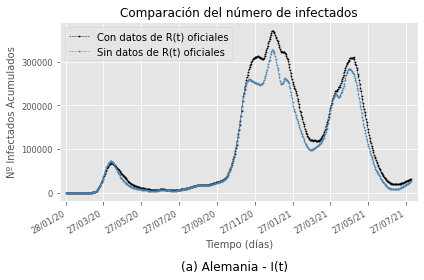

In [13]:
plot_inf_deu(inf_deu_of, inf_deu_est, date_label_deu)

In [14]:
# Function to plot the recovered comparison data
def plot_rec_deu(rec_deu_of, rec_deu_est, date_label_deu):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.plot(date_label_deu, rec_deu_of, '.--', markersize=1.5, linewidth = 0.5, label = 'Con datos de R(t) oficiales', color = 'black')
    plt.plot(date_label_deu, rec_deu_est, '.--', markersize=1.5, linewidth = 0.5, label = 'Sin datos de R(t) oficiales', color = 'steelblue')
    plt.ylabel('Nº Recuperados Cumulativo', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.title('Comparación del número de recuperados', size = 'large')
    plt.suptitle('(b) Alemania - R(t)', y = 0, x = 0.54, size = 'large')
    plt.legend(loc='upper left', fontsize = 'medium')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label_deu)+10)
    
    # Saving plot
    name_file = 'Recovered_DEU_comparison.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

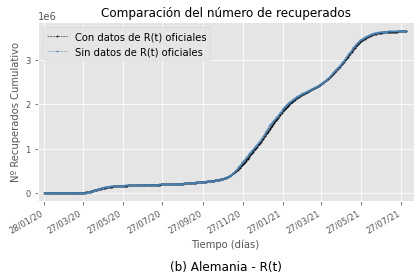

In [15]:
plot_rec_deu(rec_deu_of, rec_deu_est, date_label_deu)

## 2. Comparison KOR estimation VS oficial recovered data

In [16]:
# Loading oficial infected data
df_inf_of = pd.read_csv('Confirmed_KOR_OF.csv')
df_inf_of

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,KOR,Asia,South Korea,2020-01-28,4,0,0.571429,4,4,4,2.428571
1,KOR,Asia,South Korea,2020-01-29,4,0,0.428571,4,4,4,2.857143
2,KOR,Asia,South Korea,2020-01-30,4,0,0.428571,4,4,4,3.285714
3,KOR,Asia,South Korea,2020-01-31,11,7,1.285714,11,11,11,4.571429
4,KOR,Asia,South Korea,2020-02-01,12,1,1.428571,12,12,12,6.000000
...,...,...,...,...,...,...,...,...,...,...,...
550,KOR,Asia,South Korea,2021-07-31,199787,1442,1562.714286,199787,197689,22015,21594.857143
551,KOR,Asia,South Korea,2021-08-01,201002,1215,1548.000000,201002,198903,22298,21819.714286
552,KOR,Asia,South Korea,2021-08-02,202203,1201,1524.571429,202203,200099,22190,21834.428571
553,KOR,Asia,South Korea,2021-08-03,203926,1723,1499.857143,203926,201820,22697,22098.285714


In [17]:
# Obtaining dates and confirmed acumulated smooth data
dates_kor_of = df_inf_of['Date'].values
inf_kor_of = df_inf_of['Accumulated Alive Confirmed Smooth in 14 days'].values

len(dates_kor_of), len(inf_kor_of), dates_kor_of[0:5], inf_kor_of[0:5]

(555,
 555,
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object),
 array([2.42857143, 2.85714286, 3.28571429, 4.57142857, 6.        ]))

In [18]:
# Loading oficial recovered data
df_rec_of = pd.read_csv('Recovered_KOR_OF.csv')
df_rec_of

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,KOR,Asia,South Korea,2020-01-28,0,0.000000
1,KOR,Asia,South Korea,2020-01-29,0,0.000000
2,KOR,Asia,South Korea,2020-01-30,0,0.000000
3,KOR,Asia,South Korea,2020-01-31,0,0.000000
4,KOR,Asia,South Korea,2020-02-01,0,0.000000
...,...,...,...,...,...,...
550,KOR,Asia,South Korea,2021-07-31,175674,171341.571429
551,KOR,Asia,South Korea,2021-08-01,176605,172661.571429
552,KOR,Asia,South Korea,2021-08-02,177909,174167.857143
553,KOR,Asia,South Korea,2021-08-03,179123,175400.571429


In [19]:
# Obtaining recovered smooth data
rec_kor_of = df_rec_of['Total Recovered Smooth (7 days)'].values

len(rec_kor_of), rec_kor_of[0:5]

(555, array([0., 0., 0., 0., 0.]))

In [20]:
# Loading estimated infected data
df_inf_est = pd.read_csv('Confirmed_KOR_EST.csv')
df_inf_est

,ISO_code,Continent,Country/Region,Date,Total Confirmed,New Confirmed,New Confirmed Smooth (7 days),Total Confirmed Fixed (sum New Confirmed),Total Alive Confirmed Fixed (sum New Confirmed - Total Deaths),Accumulated Alive Confirmed in 14 days,Accumulated Alive Confirmed Smooth in 14 days
0,KOR,Asia,South Korea,2020-01-28,4,0,0.571429,4,4,4,2.428571e+00
1,KOR,Asia,South Korea,2020-01-29,4,0,0.428571,4,4,4,2.857143e+00
2,KOR,Asia,South Korea,2020-01-30,4,0,0.428571,4,4,4,3.285714e+00
3,KOR,Asia,South Korea,2020-01-31,11,7,1.285714,11,11,11,4.571429e+00
4,KOR,Asia,South Korea,2020-02-01,12,1,1.428571,12,12,12,6.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
782,KOR,Asia,South Korea,2022-03-20,9582815,209169,388084.714286,9582815,9570058,4912177,4.569622e+06
783,KOR,Asia,South Korea,2022-03-21,9936540,353725,386855.714286,9936540,9923399,5062990,4.728280e+06
784,KOR,Asia,South Korea,2022-03-22,10427247,490707,399710.285714,10427247,10413815,5211137,4.882185e+06
785,KOR,Asia,South Korea,2022-03-23,10822836,395589,367463.428571,10822836,10808934,5278930,4.985458e+06


In [21]:
# Obtaining dates and confirmed acumulated smooth data
dates_kor_est = df_inf_est['Date'].values
inf_kor_est = df_inf_est['Accumulated Alive Confirmed Smooth in 14 days'].values

len(dates_kor_est), len(inf_kor_est), dates_kor_est[0:5], inf_kor_est[0:5]

(787,
 787,
 array(['2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
        '2020-02-01'], dtype=object),
 array([2.42857143, 2.85714286, 3.28571429, 4.57142857, 6.        ]))

In [22]:
# Loading estimated recovered data
df_rec_est = pd.read_csv('Recovered_KOR_EST.csv')
df_rec_est

,ISO_code,Continent,Country/Region,Date,Total Recovered,Total Recovered Smooth (7 days)
0,KOR,Asia,South Korea,2020-01-28,0,0.000000e+00
1,KOR,Asia,South Korea,2020-01-29,0,0.000000e+00
2,KOR,Asia,South Korea,2020-01-30,0,0.000000e+00
3,KOR,Asia,South Korea,2020-01-31,0,0.000000e+00
4,KOR,Asia,South Korea,2020-02-01,0,0.000000e+00
...,...,...,...,...,...,...
782,KOR,Asia,South Korea,2022-03-20,4657880,3.955939e+06
783,KOR,Asia,South Korea,2022-03-21,4860408,4.183815e+06
784,KOR,Asia,South Korea,2022-03-22,5202677,4.429281e+06
785,KOR,Asia,South Korea,2022-03-23,5530003,4.693125e+06


In [23]:
# Obtaining recovered smooth data
rec_kor_est = df_rec_est['Total Recovered Smooth (7 days)'].values

len(rec_kor_est), rec_kor_est[0:5]

(787, array([0., 0., 0., 0., 0.]))

In [24]:
# Adjustment of the data so that all arrays are the same length
dates_kor_est = dates_kor_est[0:len(dates_kor_of)]
inf_kor_est = inf_kor_est[0:len(dates_kor_of)]
rec_kor_est = rec_kor_est[0:len(dates_kor_of)]

len(dates_kor_of), len(dates_kor_est), len(inf_kor_of), len(inf_kor_est), len(rec_kor_of), len(inf_kor_est)

(555, 555, 555, 555, 555, 555)

In [25]:
# Transform 'Date' string format to date format
date_label_kor = []
for i in range(0, len(dates_kor_of), 1):
    date = dt.datetime.strptime(dates_kor_of[i],'%Y-%m-%d').date()
    date_label_kor.append(date.strftime('%d/%m/%y')) 

len(date_label_kor)

555

In [26]:
# Function to plot the infected comparison data
def plot_inf_kor(inf_kor_of, inf_kor_est, date_label_kor):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.plot(date_label_kor, inf_kor_of, '.--', markersize=1.5, linewidth = 0.5, label = 'Con datos de R(t) oficiales', color = 'black')
    plt.plot(date_label_kor, inf_kor_est, '.--', markersize=1.5, linewidth = 0.5, label = 'Sin datos de R(t) oficiales', color = 'steelblue')
    plt.ylabel('Nº Infectados Acumulados', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.title('Comparación del número de infectados', size = 'large')
    plt.suptitle('(c) Corea del Sur - I(t)', y = 0, x = 0.545, size = 'large')
    plt.legend(loc='upper left', fontsize = 'medium')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label_kor)+10)
    
    # Saving plot
    name_file = 'Infected_KOR_comparison.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

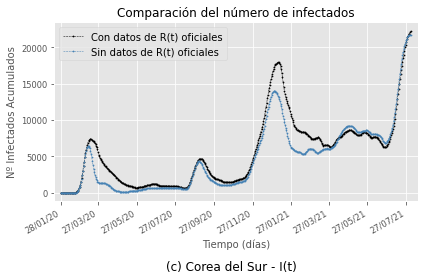

In [27]:
plot_inf_kor(inf_kor_of, inf_kor_est, date_label_kor)

In [28]:
# Function to plot the recovered comparison data
def plot_rec_kor(rec_deu_of, rec_deu_est, date_label_kor):
    
    # Importing the style package
    from matplotlib import style
    # Using the style for the plot
    plt.style.use('ggplot')
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.plot(date_label_kor, rec_kor_of, '.--', markersize=1.5, linewidth = 0.5, label = 'Con datos de R(t) oficiales', color = 'black')
    plt.plot(date_label_kor, rec_kor_est, '.--', markersize=1.5, linewidth = 0.5, label = 'Sin datos de R(t) oficiales', color = 'steelblue')
    plt.ylabel('Nº Recuperados Cumulativo', size = 'medium')
    plt.yticks(fontsize = 'small')
    plt.xlabel('Tiempo (días)', size = 'medium')
    plt.xticks(fontsize = 'small')
    plt.title('Comparación del número de recuperados', size = 'large')
    plt.suptitle('(d) Corea del Sur - R(t)', y = 0, x = 0.55, size = 'large')
    plt.legend(loc='upper left', fontsize = 'medium')
    plt.gcf().autofmt_xdate()
    plt.xlim(left=-10, right=len(date_label_kor)+10)
    
    # Saving plot
    name_file = 'Recovered_KOR_comparison.png'
    plt.tight_layout()
    plt.savefig(name_file, format='png', dpi=1200, facecolor='white', bbox_inches='tight')

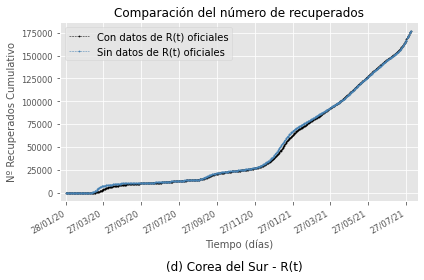

In [29]:
plot_rec_kor(rec_kor_of, rec_kor_est, date_label_kor)